In [2]:
print('31 paskaita\n(pasiruošta)')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

# import os
# import glob

31 paskaita
(pasiruošta)


In [12]:
# Turite nusiskaityti iš SQL DB lentelės autopliuslt į Pandas DataFrame 
# gamintoją, kainą, pagaminimo datą, ridą, pavarų tipą, variklio informaciją. 
# SQL užklausoje turite atmesti tuos įrašus, kur rida nenurodyta, 
# taip pat palikite tik nesikartojančius įrašus 
# (atranka pagal ID stuleplį - jei ID sutampa - reiškia, jog skelbimas dubliuojasi)

#prisijungimas prie mySQL, ir kursoriaus sukūrimas

DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

#sql užklausa per pandas sql_query
sql="""select gamintojas g, price k, pagaminimo_data d, rida r, pavaros p, variklis v from autopliuslt"""
df = pd.read_sql_query(sql, con=DB) # Sukuriamas Pandas DF.

df.head(2)

/tmp/ipykernel_58115/833140674.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, con=DB) # Sukuriamas Pandas DF.


,g,k,d,r,p,v
0,BMW,19 500,2005-12,253 000 km,Automatinė,"4999 cm³, 507 AG (373kW)"
1,Mitsubishi,2 700,2006,195 405 km,Automatinė,"2378 cm³, 160 AG (118kW)"


In [18]:
# Kuriu papildomus laukus:

def toInt(s):
    ss=s.replace(' ','').replace('km','')
    if ss.isnumeric():
        return int(ss)
    else :
        return np.nan

df['k_int']=df['k'].apply(toInt)
df['r_int']=df['r'].apply(toInt)
df['d_int']=df['d'].apply(toInt)
df['r_5000']=df['r_int'].apply(lambda s: s // 5000 * 5000) # Naudoti ceil() !!!

df.head(2)

,g,k,d,r,p,v,k_int,r_int,d_int,r_5000
0,BMW,19 500,2005-12,253 000 km,Automatinė,"4999 cm³, 507 AG (373kW)",19500,253000.0,NaN,250000.0
1,Mitsubishi,2 700,2006,195 405 km,Automatinė,"2378 cm³, 160 AG (118kW)",2700,195405.0,2006.0,195000.0


    r_5000         k_int
0      0.0  25821.842105
1   5000.0  26675.333333
2  10000.0  25454.461538


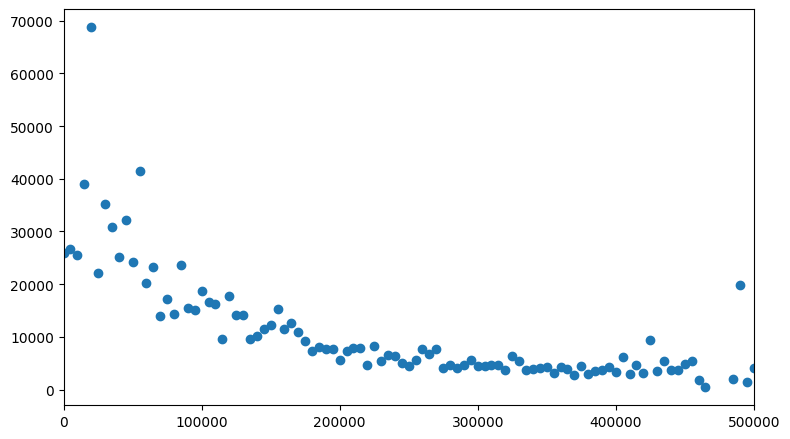

In [33]:
dfg=df[['r_5000','k_int']].groupby('r_5000').mean(numeric_only=True).reset_index()
print(dfg.head(3))

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
axis.scatter(dfg['r_5000'], dfg['k_int'])
axis.set_xlim(0,500000)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

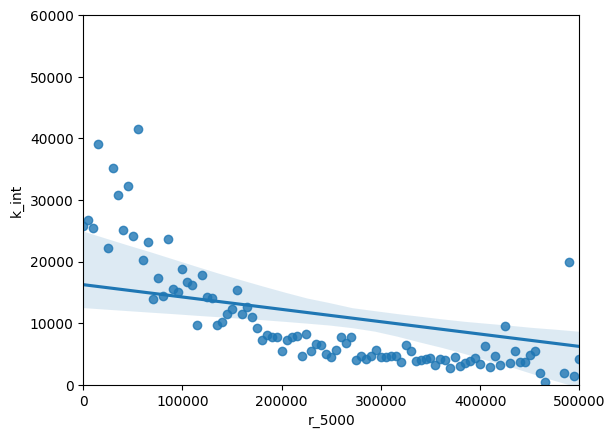

In [41]:
import seaborn as sns

axis=sns.regplot(data=dfg,x='r_5000',y='k_int')
axis.set_xlim(0,5e5)
axis.set_ylim(0,6e4)
plt.show()


In [37]:
# df['R'] = df['r'].apply(lambda s: float(s.replace(' ','').replace('km','')))
# df['K'] = df['k'].apply(lambda s: float(s.replace(' ','').replace('km','')))
# # df['amžius'] = df['d'].apply(lambda s: 2024-int(s[:4])) # ???
# df.head()

In [ ]:
# Vizualizuokite, kaip nuo amžiaus priklauso automobilių kaina. 
# Panaudokite seaborn regplot, kad pademonstruotumėte trendą.
